# 8.5.3 The generator

### Listing 8.29 GAN generator network

In [8]:
import keras
from keras import layers
import numpy as np
latent_dim = 32
height = 32
width = 32
channels = 3

generator_input = keras.Input(shape=(latent_dim,))

x = layers.Dense(128 * 16 * 16)(generator_input)
x = layers.LeakyReLU()(x)
x = layers.Reshape((16, 16, 128))(x)

x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2DTranspose(256, 4, strides=2, padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(channels, 7, activation='tanh', padding='same')(x)
generator = keras.models.Model(generator_input, x)
generator.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32768)             1081344   
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 32768)             0         
_________________________________________________________________
reshape (Reshape)            (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 256)       819456    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 32, 32, 256)       1048

### Listing 8.30 The GAN discriminator network

In [9]:
discriminator_input = layers.Input(shape=(height, width, channels))
x = layers.Conv2D(128, 3)(discriminator_input)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)

x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Flatten()(x)

x = layers.Dropout(0.4)(x)
x = layers.Dense(1, activation='sigmoid')(x)
discriminator = keras.models.Model(discriminator_input, x)
discriminator.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 128)       262272    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 6, 6, 128)         262272    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 6, 6, 128)         0   

In [10]:
discriminator_optimizer = keras.optimizers.RMSprop(
    lr=0.0008,
    clipvalue=1.0,
    decay=1e-8)

In [11]:
discriminator.compile(optimizer=discriminator_optimizer,
                      loss='binary_crossentropy')

### Listing 8.31 Adversarial network

In [15]:
discriminator.trainable = False
gan_input = keras.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = keras.models.Model(gan_input, gan_output)

gan_optimizer = keras.optimizers.RMSprop(lr=0.0004, clipvalue=1.0, decay=1e-8)
gan.compile(optimizer=gan_optimizer, loss='binary_crossentropy')

### Listing 8.32 Implementing GAN training

In [16]:
import os
from keras.preprocessing import image
(x_train, y_train), (_, _) = keras.datasets.cifar10.load_data()

x_train = x_train[y_train.flatten() == 6]
x_train = x_train.reshape((x_train.shape[0],) +
                          (height, width, channels)).astype('float32') / 255.

In [17]:
iterations = 10000
batch_size = 20
save_dir = '/content/your_dir'

discriminator loss: 0.647415816783905
adversarial loss: 0.8674865961074829


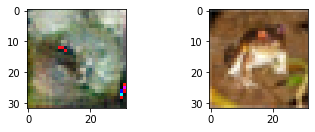

discriminator loss: 0.6741709113121033
adversarial loss: 0.797357976436615


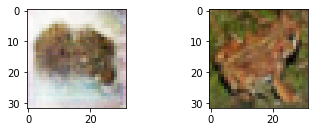

discriminator loss: 0.6956102252006531
adversarial loss: 0.7433830499649048


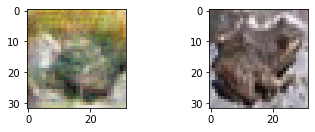

discriminator loss: 0.7246116399765015
adversarial loss: 0.8580209612846375


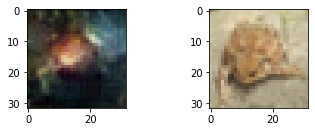

discriminator loss: 0.6810285449028015
adversarial loss: 0.7730374932289124


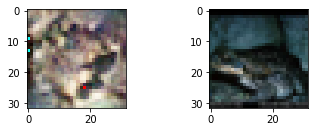

discriminator loss: 0.6206181645393372
adversarial loss: 0.9133722186088562


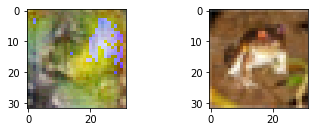

discriminator loss: 0.6940743923187256
adversarial loss: 0.7699028849601746


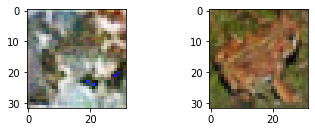

discriminator loss: 0.7114415168762207
adversarial loss: 0.8036968111991882


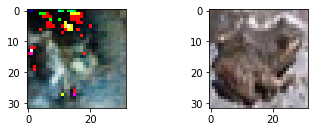

discriminator loss: 0.77070152759552
adversarial loss: 0.7245949506759644


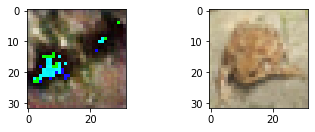

discriminator loss: 0.6921431422233582
adversarial loss: 0.7415512800216675


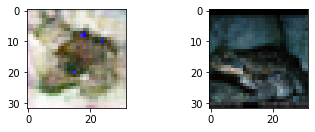

discriminator loss: 0.6718494296073914
adversarial loss: 1.008025884628296


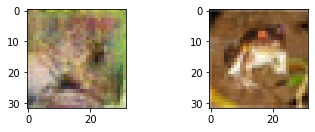

discriminator loss: 0.6787295341491699
adversarial loss: 0.8010431528091431


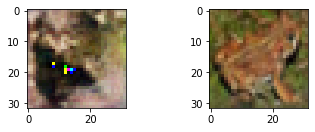

discriminator loss: 0.6659133434295654
adversarial loss: 0.7191160321235657


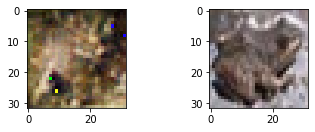

discriminator loss: 0.6788339018821716
adversarial loss: 0.9110328555107117


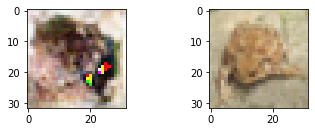

discriminator loss: 0.7134034037590027
adversarial loss: 0.8280061483383179


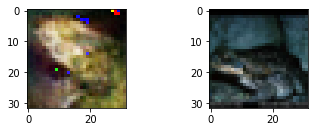

discriminator loss: 0.6800298690795898
adversarial loss: 0.769923210144043


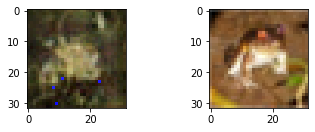

discriminator loss: 0.6843178868293762
adversarial loss: 0.8077163696289062


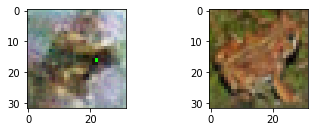

discriminator loss: 0.6803185343742371
adversarial loss: 0.8070985674858093


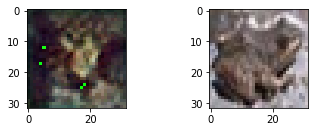

discriminator loss: 0.7008804678916931
adversarial loss: 0.6977130770683289


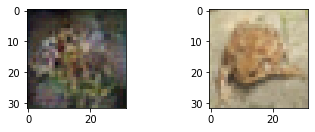

discriminator loss: 0.6945978403091431
adversarial loss: 0.9895036816596985


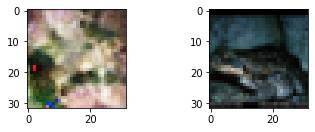

discriminator loss: 0.6705151796340942
adversarial loss: 0.673108696937561


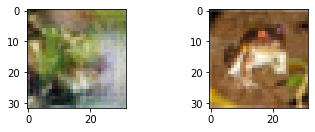

discriminator loss: 0.6989472508430481
adversarial loss: 0.7434948682785034


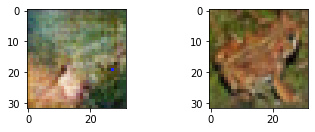

discriminator loss: 0.7035166025161743
adversarial loss: 0.7817686200141907


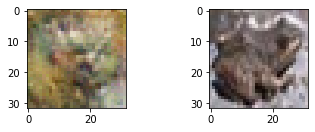

discriminator loss: 0.7322624921798706
adversarial loss: 0.9259670972824097


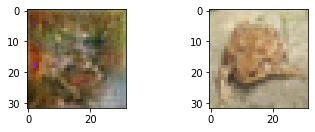

discriminator loss: 0.6276851296424866
adversarial loss: 1.2770246267318726


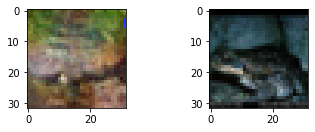

discriminator loss: 0.6793828010559082
adversarial loss: 0.7406105995178223


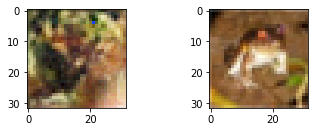

discriminator loss: 0.6628965139389038
adversarial loss: 0.851944088935852


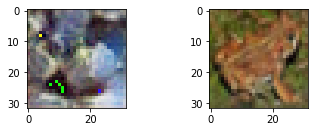

discriminator loss: 0.7779036164283752
adversarial loss: 1.033107042312622


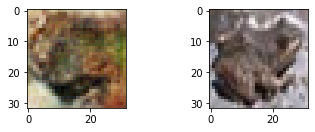

discriminator loss: 0.6775120496749878
adversarial loss: 0.813597559928894


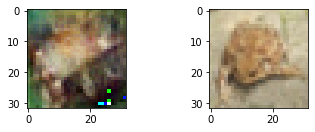

discriminator loss: 0.6950788497924805
adversarial loss: 0.8501739501953125


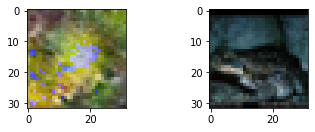

discriminator loss: 0.6937201619148254
adversarial loss: 0.8270065188407898


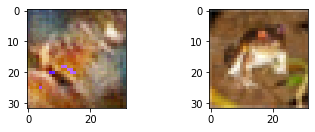

discriminator loss: 0.6750472187995911
adversarial loss: 0.7267410755157471


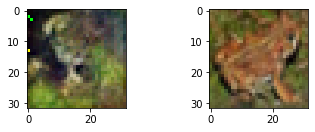

discriminator loss: 0.7060619592666626
adversarial loss: 0.8293431997299194


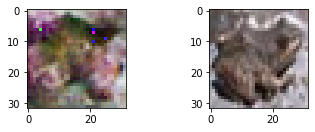

discriminator loss: 0.6789286732673645
adversarial loss: 0.7863717675209045


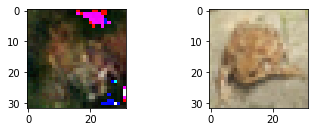

discriminator loss: 0.7277420163154602
adversarial loss: 1.1234358549118042


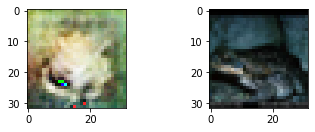

discriminator loss: 0.6690647602081299
adversarial loss: 1.342120885848999


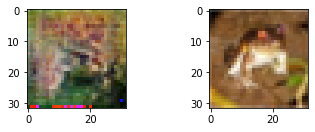

discriminator loss: 0.6830672025680542
adversarial loss: 0.7031687498092651


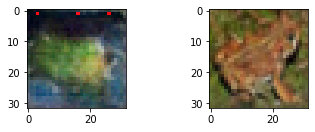

discriminator loss: 0.6842135787010193
adversarial loss: 0.7741668820381165


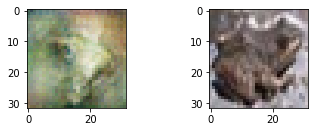

discriminator loss: 0.6969645619392395
adversarial loss: 0.9808188676834106


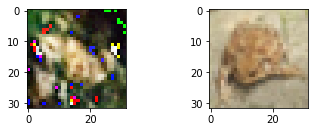

discriminator loss: 0.8234564065933228
adversarial loss: 1.0448670387268066


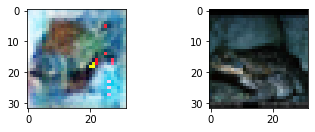

discriminator loss: 0.6738123893737793
adversarial loss: 0.7917560338973999


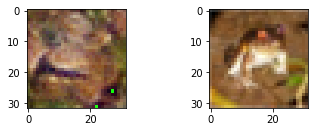

discriminator loss: 0.6810015439987183
adversarial loss: 0.8106280565261841


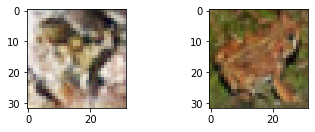

discriminator loss: 0.718691349029541
adversarial loss: 0.782795786857605


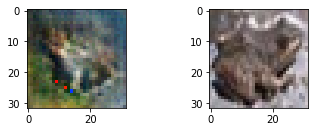

discriminator loss: 0.8125371932983398
adversarial loss: 1.127075433731079


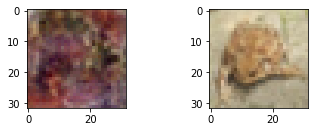

discriminator loss: 0.714329719543457
adversarial loss: 0.8840688467025757


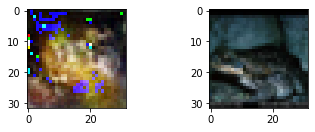

discriminator loss: 0.6671038866043091
adversarial loss: 0.77696692943573


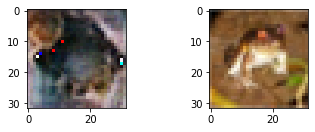

discriminator loss: 0.6797823309898376
adversarial loss: 0.7472654581069946


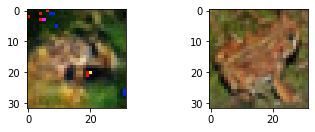

discriminator loss: 0.7143112421035767
adversarial loss: 0.7963005900382996


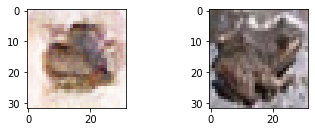

discriminator loss: 0.6723724603652954
adversarial loss: 0.8243921399116516


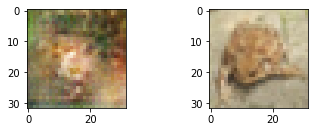

discriminator loss: 0.6753700971603394
adversarial loss: 0.7323817610740662


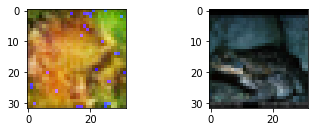

discriminator loss: 0.6114629507064819
adversarial loss: 0.9272149205207825


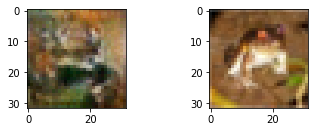

discriminator loss: 0.6853200197219849
adversarial loss: 0.6984454393386841


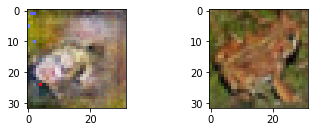

discriminator loss: 0.6781449317932129
adversarial loss: 0.9599040150642395


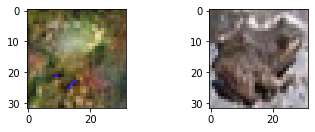

discriminator loss: 0.6667259335517883
adversarial loss: 0.8758466839790344


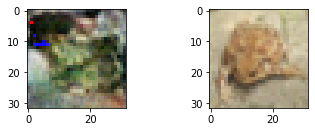

discriminator loss: 0.7004863023757935
adversarial loss: 0.7289814949035645


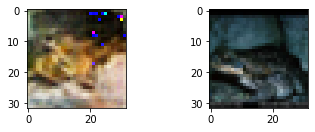

discriminator loss: 0.694771409034729
adversarial loss: 0.8203592300415039


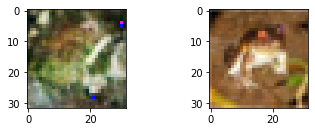

discriminator loss: 0.7108818888664246
adversarial loss: 0.8760523796081543


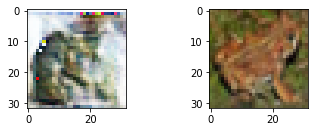

discriminator loss: 0.6846486330032349
adversarial loss: 0.8028343319892883


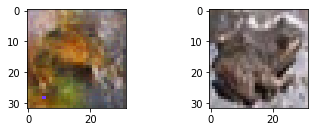

discriminator loss: 0.6908143758773804
adversarial loss: 0.8356295824050903


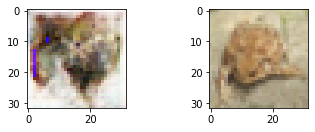

discriminator loss: 0.6727322936058044
adversarial loss: 0.7589339017868042


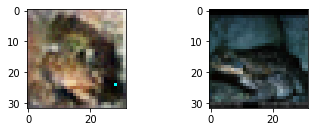

discriminator loss: 0.7075616717338562
adversarial loss: 0.8535898923873901


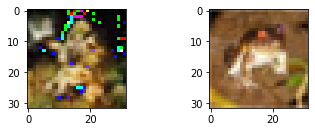

discriminator loss: 0.7034723162651062
adversarial loss: 0.8447238206863403


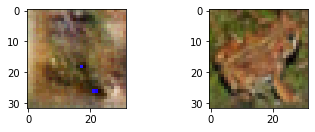

discriminator loss: 0.6841391324996948
adversarial loss: 0.6754242181777954


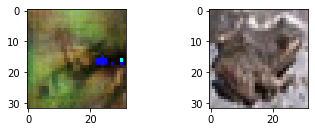

discriminator loss: 0.6760150194168091
adversarial loss: 0.7979727983474731


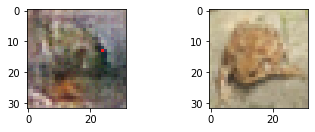

discriminator loss: 0.6754480600357056
adversarial loss: 0.7444664835929871


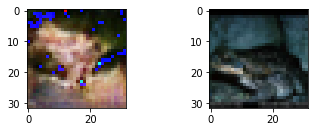

discriminator loss: 0.6612980365753174
adversarial loss: 0.8669297099113464


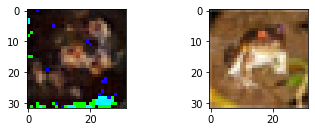

discriminator loss: 0.710269570350647
adversarial loss: 0.7245102524757385


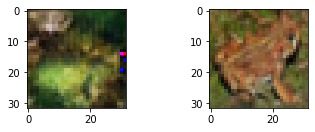

discriminator loss: 0.6828612089157104
adversarial loss: 0.6910759210586548


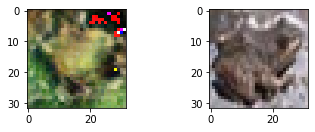

discriminator loss: 1.292391061782837
adversarial loss: 12.028374671936035


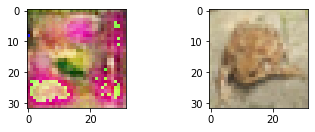

discriminator loss: 0.6990931630134583
adversarial loss: 0.8215948343276978


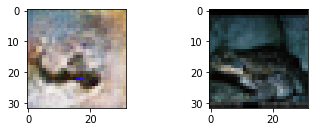

discriminator loss: 0.634095311164856
adversarial loss: 1.3276500701904297


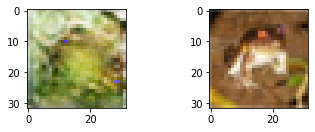

discriminator loss: 0.6764892339706421
adversarial loss: 0.7171210050582886


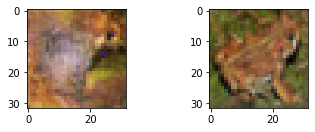

discriminator loss: 0.6505902409553528
adversarial loss: 0.8717802166938782


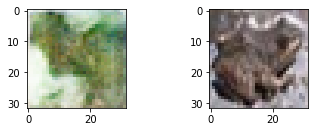

discriminator loss: 0.6817449927330017
adversarial loss: 0.7719246745109558


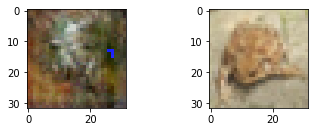

discriminator loss: 0.6881720423698425
adversarial loss: 0.7447050213813782


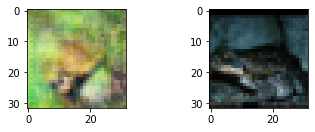

discriminator loss: 0.6985406875610352
adversarial loss: 0.9059001803398132


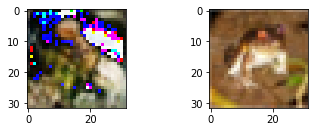

discriminator loss: 0.6928858160972595
adversarial loss: 0.7819565534591675


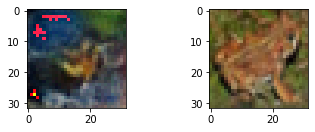

discriminator loss: 0.6933125257492065
adversarial loss: 0.7051460146903992


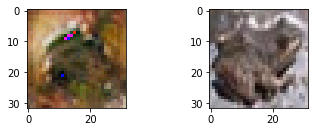

discriminator loss: 0.6790079474449158
adversarial loss: 0.8526719212532043


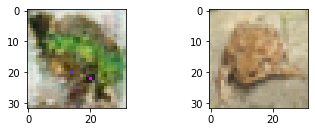

discriminator loss: 0.7272261381149292
adversarial loss: 0.6570996046066284


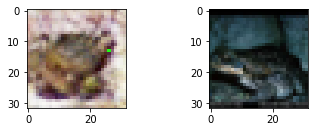

discriminator loss: 0.6429787874221802
adversarial loss: 0.9325466156005859


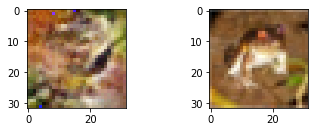

discriminator loss: 0.6315938830375671
adversarial loss: 0.8840233087539673


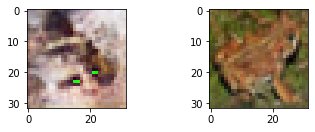

discriminator loss: 0.6992725133895874
adversarial loss: 1.3015400171279907


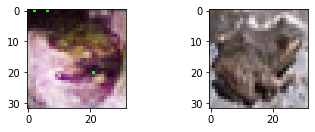

discriminator loss: 0.6603270769119263
adversarial loss: 0.8218563199043274


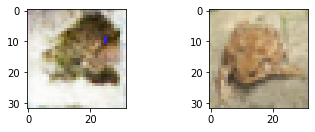

discriminator loss: 0.6380162835121155
adversarial loss: 0.8957536816596985


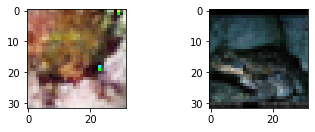

discriminator loss: 0.7043933868408203
adversarial loss: 1.0957257747650146


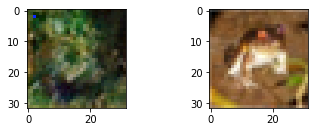

discriminator loss: 0.7016099691390991
adversarial loss: 0.7512890100479126


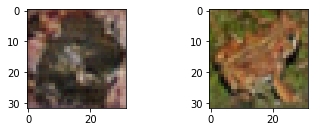

discriminator loss: 0.6691384315490723
adversarial loss: 1.0605418682098389


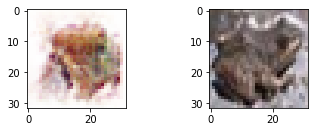

discriminator loss: 0.6645756959915161
adversarial loss: 1.0655471086502075


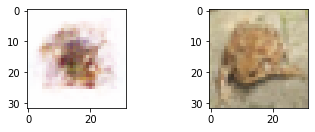

discriminator loss: 0.6818254590034485
adversarial loss: 0.863193690776825


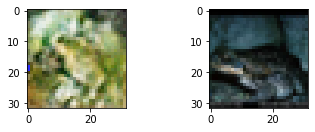

discriminator loss: 0.5338464379310608
adversarial loss: 1.037168025970459


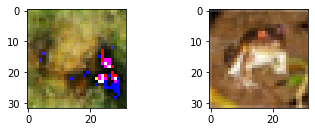

discriminator loss: 0.6207445859909058
adversarial loss: 1.3763198852539062


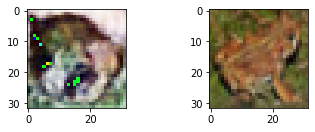

discriminator loss: 0.4192464351654053
adversarial loss: 1.1689519882202148


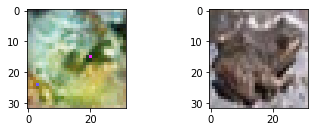

discriminator loss: 0.6295250654220581
adversarial loss: 0.9300307035446167


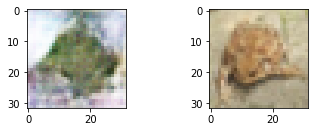

discriminator loss: 0.598273754119873
adversarial loss: 0.8331926465034485


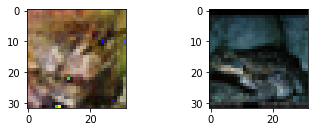

discriminator loss: 0.5477886199951172
adversarial loss: 3.4793548583984375


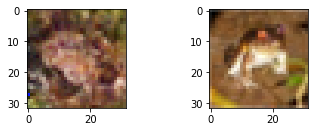

discriminator loss: 0.3363035321235657
adversarial loss: 2.3693675994873047


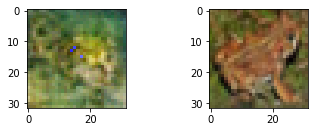

discriminator loss: 0.21202246844768524
adversarial loss: 2.597154140472412


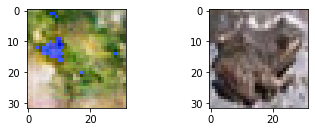

discriminator loss: 0.859322726726532
adversarial loss: 2.5693869590759277


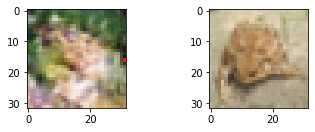

discriminator loss: 0.22509007155895233
adversarial loss: 3.3572146892547607


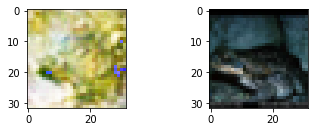

In [51]:
start = 0
for step in range(iterations):
  random_latent_vectors = np.random.normal(size=(batch_size,
                                                 latent_dim))
  generated_images = generator.predict(random_latent_vectors)
  stop = start + batch_size
  real_images = x_train[start: stop]
  combined_images = np.concatenate([generated_images, real_images])

  labels = np.concatenate([np.ones((batch_size, 1)),
  np.zeros((batch_size, 1))])
  labels += 0.05 * np.random.random(labels.shape)

  d_loss = discriminator.train_on_batch(combined_images, labels)
  random_latent_vectors = np.random.normal(size=(batch_size,
                                                 latent_dim))
  misleading_targets = np.zeros((batch_size, 1))
  a_loss = gan.train_on_batch(random_latent_vectors,
                              misleading_targets)
  start += batch_size
  if start > len(x_train) - batch_size:
    start = 0

  if step % 100 == 0:
    gan.save_weights('gan.h5')
    print('discriminator loss:', d_loss)
    print('adversarial loss:', a_loss)   

    img1 = image.array_to_img(generated_images[0] * 255., scale=False)
    img1.save(os.path.join(save_dir,
                          'generated_frog' + str(step) + '.png')) 
    img2 = image.array_to_img(real_images[0] * 255., scale=False)
    img2.save(os.path.join(save_dir,
                          'real_frog' + str(step) + '.png'))
    
    fig = plt.figure()
    ax1 = fig.add_subplot(2,2,1)
    ax1.imshow(img1)
    ax2 = fig.add_subplot(2,2,2)
    ax2.imshow(img2)
    plt.show()
    